## 災害データ分析とストーリーテリング

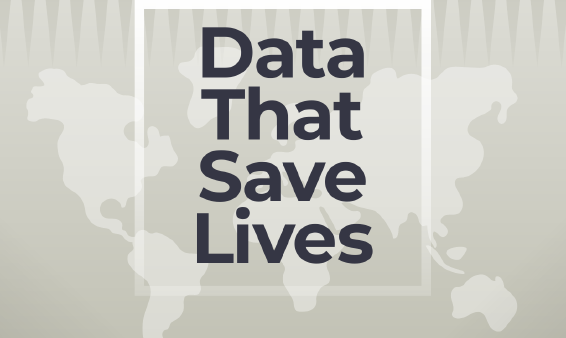
#### **チャレンジの目的**

このチャレンジでは、EM-DAT災害データセットのデータを使ってストーリーを伝える.ipynbファイルを作成します。あなたの独自の視点からデータを分析し、有意義な洞察を導き出し、それを簡潔かつ効果的に視覚的に表現することが目標です。Be creative!

#### **データセットの概要**
https://www.emdat.be/

#### **提出物**

1. **提出物の形式**:
   - Jupyter Notebook (.ipynb) ファイル
   - Markdownセルを使用して、分析の説明、洞察、結論を含むストーリーを伝える。ブログ投稿のように構成すると良いでしょう！
   - コードセルを使用して、データの読み込み、前処理、分析、可視化を行う。
   - Notebook内で生成されたグラフやチャートを含める。
   - 必ず自分のやっていること、感想、学んだことを説明する。

2. **提出方法**:
   - GitHubリポジトリにNotebookをコミットする
   - UNIPAにNotebookのリンクを提出する

3. **締め切り**:
   - 次回のクラス開始前までに提出すること



#### **要件**
1. **フォーカスエリア**:
   - 興味に基づいて**フォーカスエリア**を選択する（例: 災害の種類、死者数、人への影響、地域分析、または時間的トレンド）。

2. **分析**:
   - 計算やデータ探索を通じて、少なくとも**3つの重要な洞察**を提供する。
   - 興味深い統計（種類・地域別の数とか）、トレンド、または異常値を特定する。

3. **可視化**:
   - 分析をサポートする**少なくとも2つの可視化**を作成する。
   - 関連性があり解釈しやすいチャート（例: 棒グラフ、折れ線グラフ、散布図、ヒートマップ）を使用する。

4. **サマリー**:
   - 発見した内容を簡潔にまとめ、その重要性を説明する。



## まずはデータの読み込みから

UNIPAからデータCSVファイルemdata.csvを取得し、このノートブックと同じフォルダに配置してください。次に、以下のコードを実行してデータをpandas DataFrameに読み込みます。



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [2]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## ここからはあなたの分析

以下はあくまでも例：

# *世界の災害について*

#### **災害の種類別数top15**

In [23]:
import pandas as pd

# ---------------------------------------------------------
# 1. CSV 読み込み
# ---------------------------------------------------------
file_path = r"C:\Users\shunk\Downloads\emdat.csv"
df = pd.read_csv(file_path)

# ---------------------------------------------------------
# 2. カラム名を確認
# ---------------------------------------------------------
print("Columns:", df.columns.tolist())

# ---------------------------------------------------------
# 3. 災害の種類別数を集計
# ---------------------------------------------------------
col = "Disaster Type"

if col not in df.columns:
    raise ValueError(f"カラム '{col}' が存在しません。上の Columns 出力を確認してください。")

ranking = df[col].value_counts().reset_index()
ranking.columns = ["Disaster Type", "Count"]

# ---------------------------------------------------------
# 4. 結果表示（グラフなし）
# ---------------------------------------------------------
print("\n=== 災害の種類別数 ===")
print(ranking)


Columns: ['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO', 'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year', 'Total Deaths']

=== 災害の種類別数 ===
                  Disaster Type  Count
0                         Flood   6014
1                         Storm   4857
2                    Earthquake   1624
3                      Epidemic   1503
4           Mass movement (wet)    846
5                       Drought    824
6           Extreme temperature    692
7                      Wildfire    490
8             Volcanic activity    279
9                   Infestation     95
10          Mass movement (dry)     46
11  Glacial lake outburst flood      5
12                          Fog      1
13                       Impact      1
14              Animal incident      1


In [10]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Meiryo"   # ← これを追加（Windows）


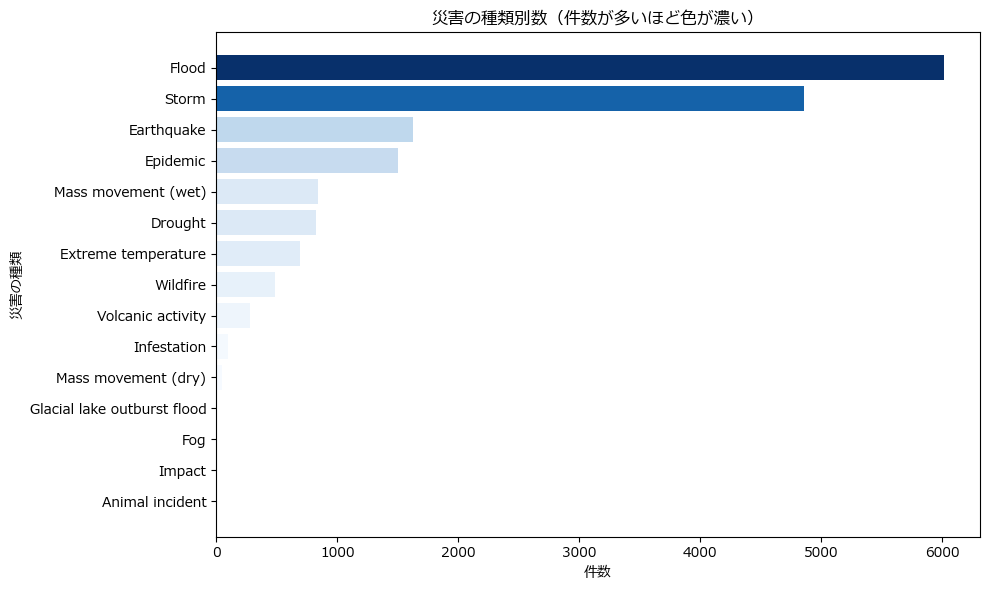

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 日本語フォント設定（Windows: メイリオ）
plt.rcParams["font.family"] = "Meiryo"

# ---------------------------------------------------------
# 1. CSV 読み込み
# ---------------------------------------------------------
file_path = r"C:\Users\shunk\Downloads\emdat.csv"
df = pd.read_csv(file_path)

# ---------------------------------------------------------
# 2. 災害の種類別数を集計
# ---------------------------------------------------------
col = "Disaster Type"

if col not in df.columns:
    raise ValueError(f"カラム '{col}' が存在しません。")

ranking = df[col].value_counts().reset_index()
ranking.columns = ["Disaster Type", "Count"]

# ---------------------------------------------------------
# 3. 件数に応じて色を濃くする（0〜1に正規化して濃淡をつける）
# ---------------------------------------------------------
counts = ranking["Count"]
norm = (counts - counts.min()) / (counts.max() - counts.min() + 1e-9)

# colormap を使って濃淡色生成（件数多いほど濃い青）
colors = plt.cm.Blues(norm)

# ---------------------------------------------------------
# 4. グラフ化
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.barh(ranking["Disaster Type"], ranking["Count"], color=colors)

plt.xlabel("件数")
plt.ylabel("災害の種類")
plt.title("災害の種類別数（件数が多いほど色が濃い）")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


やったこと

世界の災害の種類別数が気になったため、集計しました。
図では棒グラフを使い、わかりやすいように件数が多いほど色が濃くなるようにしました。

#### ***3つの洞察***

1.
分析

世界の災害の約6割は「洪水・暴風」を中心とした気象災害。
地震よりも圧倒的に発生頻度が高い。

考察

これは、気候変動による極端気象の増加・洪水の記録が比較的体系的に収集されやすい
ことが要因と考えられる。

2.
Volcanic activity （279件）は火山地域限定。
Glacial lake outburst flood（氷河湖決壊洪水）（5件）は高山・極地に限定される。
Animal incident（動物関連災害）（1件）はそもそも稀。
これらの現象（特に下2つ）は、稀な現象である。

3.
分析

Epidemic（1503件）は地震とほぼ同数と多い。

考察

これは20世紀前半～中盤の感染症アウトブレイクの多発や近年のエボラ・COVID-19 などで継続的に記録が追加
されていることなどが背景だと思う。

#### **世界と比べて日本で起こっている災害の割合・日本での災害別数**

#### **➀世界と比べて日本で送っている災害の割合**

=== 世界と日本の災害比較 ===
世界の災害件数 : 17278
日本の災害件数 : 391
日本の割合     : 2.26%


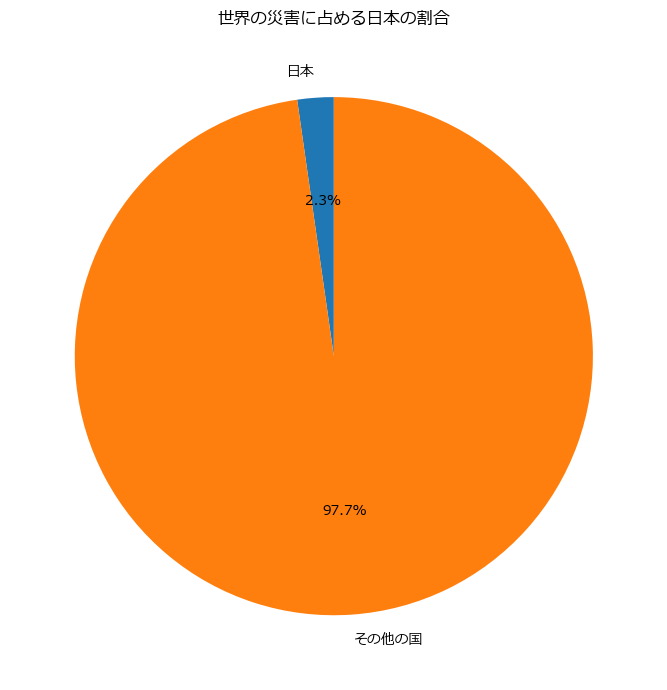

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォント設定（Windows）
plt.rcParams["font.family"] = "Meiryo"

# ---------------------------------------------------------
# 1. CSV 読み込み
# ---------------------------------------------------------
file_path = r"C:\Users\shunk\Downloads\emdat.csv"
df = pd.read_csv(file_path)

# ---------------------------------------------------------
# 2. 国名カラムを探す
# ---------------------------------------------------------
country_candidates = ["Country", "Country name", "Country Name", "country"]
country_col = None

for col in country_candidates:
    if col in df.columns:
        country_col = col
        break

if country_col is None:
    raise ValueError("国名カラムが見つかりません。Columns 出力を確認してください。")

# ---------------------------------------------------------
# 3. 世界と日本の災害件数を計算
# ---------------------------------------------------------
total_world = len(df)
total_japan = len(df[df[country_col] == "Japan"])
total_other = total_world - total_japan

ratio = total_japan / total_world * 100

print("=== 世界と日本の災害比較 ===")
print(f"世界の災害件数 : {total_world}")
print(f"日本の災害件数 : {total_japan}")
print(f"日本の割合     : {ratio:.2f}%")

# ---------------------------------------------------------
# 4. 普通の円グラフ
# ---------------------------------------------------------
labels = ["日本", "その他の国"]
sizes = [total_japan, total_other]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("世界の災害に占める日本の割合")
plt.tight_layout()
plt.show()


やったこと

世界と日本の災害比率が気になったため、集計しました。
図では最適だと思った円グラフを利用して、割合を表示し、色を違う色に分けてパッとわかりやすいようにしました。

#### **➁日本での災害別数**


=== 日本での災害種類別集計 ===
         Disaster Type  Count
0                Storm    198
1           Earthquake     72
2                Flood     61
3  Mass movement (wet)     23
4  Extreme temperature     17
5    Volcanic activity     15
6             Epidemic      3
7              Drought      1
8             Wildfire      1


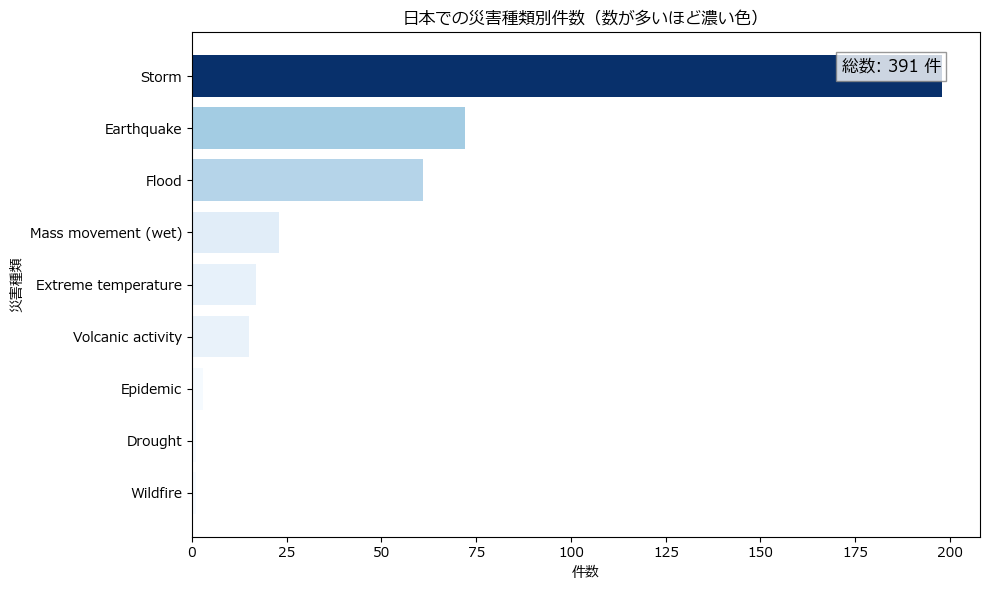

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 日本語フォント設定（Windows）
plt.rcParams["font.family"] = "Meiryo"

# ---------------------------------------------------------
# 1. CSV 読み込み
# ---------------------------------------------------------
file_path = r"C:\Users\shunk\Downloads\emdat.csv"
df = pd.read_csv(file_path)

# ---------------------------------------------------------
# 2. カラム名を自動判定
# ---------------------------------------------------------
country_candidates = ["Country", "Country name", "Country Name", "country"]
disaster_candidates = ["Disaster Type", "Disaster type", "Disaster_Type"]

country_col = next((c for c in country_candidates if c in df.columns), None)
disaster_col = next((c for c in disaster_candidates if c in df.columns), None)

if country_col is None:
    raise ValueError("国名カラムが見つかりません。")

if disaster_col is None:
    raise ValueError("災害種類カラムが見つかりません。")

# ---------------------------------------------------------
# 3. 日本データを抽出
# ---------------------------------------------------------
df_japan = df[df[country_col] == "Japan"]

# ---------------------------------------------------------
# 4. 種類別件数を集計
# ---------------------------------------------------------
ranking_japan = df_japan[disaster_col].value_counts().reset_index()
ranking_japan.columns = ["Disaster Type", "Count"]

print("\n=== 日本での災害種類別集計 ===")
print(ranking_japan)

# 総数を計算
total_count = ranking_japan["Count"].sum()

# ---------------------------------------------------------
# 5. 色を「件数に比例して濃く」設定
# ---------------------------------------------------------
counts = ranking_japan["Count"]
norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.Blues(norm(counts))

# ---------------------------------------------------------
# 6. グラフ描画
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.barh(ranking_japan["Disaster Type"], ranking_japan["Count"], color=colors)

plt.xlabel("件数")
plt.ylabel("災害種類")
plt.title("日本での災害種類別件数（数が多いほど濃い色）")

# 総数を右上に追加
plt.text(
    0.95, 0.95,
    f"総数: {total_count} 件",
    transform=plt.gca().transAxes,
    ha='right',
    va='top',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8)
)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


やったこと

日本での災害種類別件数が気になったため、集計しました。
図では結果をまとめるのに適切であると思う棒グラフを利用し、
わかりやすいように数が多いほど色が濃くなるようにしました。

#### ***3つの洞察***

1.
分析

日本の災害件数は世界の2.26%と非常に少ない。
世界全体：17,278 件
日本：391 件（2.26%）
これは、日本は災害大国であるという印象とは異なり、件数だけを見ると世界の中では決して多くない
ことを示している。

考察

世界平均（1国あたり） = 17,278件 / 約200カ国 ≈ 86件
日本 = 391件 → 平均の約4.5倍
日本は平均より多いが、世界全体の中では大きな比率を占めない。
つまり、限られた地域で頻度が高いタイプの災害が集中している国といえると思う。

2.
分析

Storm（台風・暴風）が圧倒的に最多で、全体の約 50.6% を占める。
storm_ratio = 198 / 391 ≈ 50.6%

考察

日本の災害の半分以上はStorm（台風・暴風） によるもので、
これは日本が太平洋側に面する台風の通過ルート上にある温暖湿潤な気候帯に属する
という地理的条件を強く反映していると思われる。

3.
分析

Drought（干ばつ）と Wildfire（山火事）はほぼ発生しない → 日本気候の特異性

考察

日本の夏は高温多湿・降水量が多い・森林は水分を含む・風向きと土地利用が山火事を広めにくい。
これらの条件のため、世界で多発する災害の上位（干ばつ・山火事）が日本ではほぼゼロだと思われる。

#### **地域別災害数**

読み込んだ列一覧：
['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO', 'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year', 'Total Deaths']

--------------------------------------

使用する地域列: Region

地域別災害数：
Region
Asia        6901
Americas    4309
Africa      3181
Europe      2173
Oceania      714
Name: count, dtype: int64


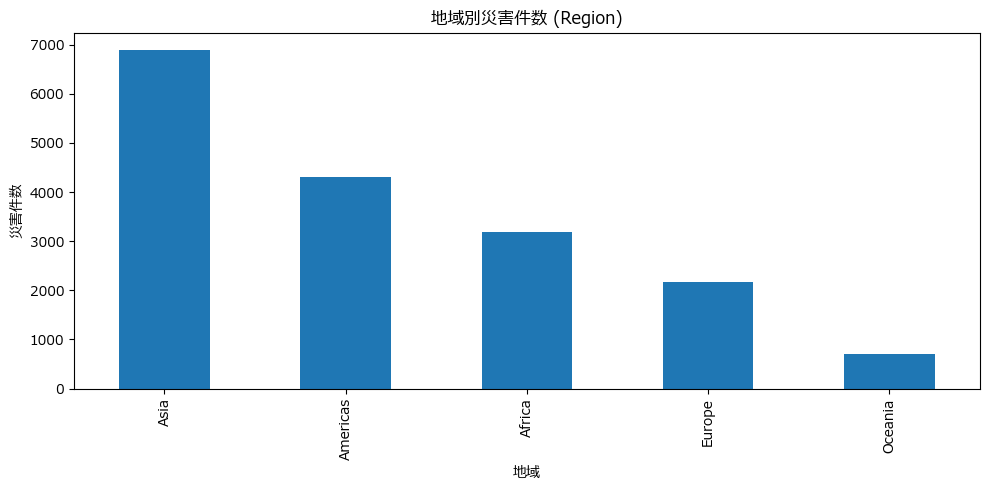

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォント（Windows）
plt.rcParams["font.family"] = "Meiryo"

# --------------------------------------
# 1. CSV 読み込み
# --------------------------------------
file_path = r"C:\Users\shunk\Downloads\emdat.csv"
df = pd.read_csv(file_path)

print("読み込んだ列一覧：")
print(df.columns.tolist())
print("\n--------------------------------------\n")

# --------------------------------------
# 2. 地域情報に使えそうな列の自動判定
# --------------------------------------
possible_region_cols = ["Region", "Subregion", "Continent", "Subregion Name", "Region Name"]

region_col = None
for col in possible_region_cols:
    if col in df.columns:
        region_col = col
        break

if region_col is None:
    raise ValueError("地域を表す列（Region, Subregion, Continent など）が見つかりませんでした。")

print(f"使用する地域列: {region_col}")

# --------------------------------------
# 3. 地域別災害件数の集計
# --------------------------------------
region_counts = df[region_col].value_counts().sort_values(ascending=False)
print("\n地域別災害数：")
print(region_counts)

# --------------------------------------
# 4. グラフ化（棒グラフ）
# --------------------------------------
plt.figure(figsize=(10, 5))
region_counts.plot(kind="bar")

plt.title(f"地域別災害件数 ({region_col})")
plt.xlabel("地域")
plt.ylabel("災害件数")
plt.tight_layout()

plt.show()


In [20]:
import pandas as pd
import folium

# CSV 読み込み
file_path = r"C:\Users\shunk\Downloads\emdat.csv"
df = pd.read_csv(file_path)

# 緯度・経度列の自動検出
lat_candidates = ["Latitude", "latitude", "LAT", "lat", "Lat"]
lon_candidates = ["Longitude", "longitude", "LON", "lon", "Long", "LONG", "Lon"]

lat_col = next((c for c in lat_candidates if c in df.columns), None)
lon_col = next((c for c in lon_candidates if c in df.columns), None)

df = df.dropna(subset=[lat_col, lon_col])

# ---- ▼ 災害名をすべての点に表示するための処理 ▼ ----

# 災害名になりえる列をリスト化
name_candidates = [
    "Event Name", "Event_Name", "event name", 
    "Disaster Subtype", "Disaster_Subtype", "Subtype", 
    "Disaster Type", "Type"
]

# 実際に存在する災害名関連列だけ抽出
valid_name_cols = [c for c in name_candidates if c in df.columns]

def get_disaster_name(row):
    # 候補のどれかに名前が入っていれば使う
    for col in valid_name_cols:
        name = row.get(col)
        if pd.notna(name):
            return str(name)

    # どれにも無い → Disaster Type を代用
    if "Disaster Type" in df.columns:
        return str(row["Disaster Type"])

    # それもなければ Unknown だが、このケースはほぼない
    return "Unknown Disaster"

# ---- ▲ ここまで災害名判定ロジック ▲ ----


# 災害種類ごとに色設定
if "Disaster Type" in df.columns:
    disaster_types = df["Disaster Type"].fillna("Unknown").unique()
else:
    disaster_types = ["Unknown"]

colors = [
    "red","blue","green","purple","orange","darkred","lightred",
    "beige","darkblue","darkgreen","cadetblue","darkpurple",
    "pink","lightblue","lightgreen","gray","black"
]

color_map = {d: colors[i % len(colors)] for i, d in enumerate(disaster_types)}

# 地図中心
center_lat = df[lat_col].astype(float).mean()
center_lon = df[lon_col].astype(float).mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# ---- 点を追加（必ず全部の点で災害名が表示される） ----
for _, row in df.iterrows():

    disaster_name = get_disaster_name(row)
    disaster_type = row.get("Disaster Type", "Unknown")
    country = row.get("Country", "N/A")
    year = row.get("Start Year", "N/A")

    popup_text = (
        f"<b>災害名:</b> {disaster_name}<br>"
        f"<b>災害種類:</b> {disaster_type}<br>"
        f"<b>国:</b> {country}<br>"
        f"<b>発生年:</b> {year}"
    )

    folium.CircleMarker(
        location=[float(row[lat_col]), float(row[lon_col])],
        radius=4,
        popup=popup_text,
        color=color_map.get(disaster_type, "gray"),
        fill=True,
        fill_color=color_map.get(disaster_type, "gray"),
        fill_opacity=0.8
    ).add_to(m)

# 出力
output_path = r"C:\Users\shunk\Downloads\emdat_map.html"
m.save(output_path)

print("➡", output_path)


➡ C:\Users\shunk\Downloads\emdat_map.html


In [21]:
import webbrowser
import os

# 表示したい HTML ファイル
html_path = r"C:\Users\shunk\Downloads\emdat_map.html"

# 絶対パスに変換
full_path = os.path.abspath(html_path)

# ブラウザで開く
webbrowser.open(f"file:///{full_path}")

print("HTML をブラウザで開きました。")


HTML をブラウザで開きました。


↑　実行すると地図が開きます。

やったこと

地域別災害数が気になったため、集計しました。地域別なので、図では、どこで災害があったのかがわかりやすいように
地図上に災害があった地点を表示しました。
災害があった地点には点を付けたのですが、最初は全ての点の色が同じでわかりにくかったので、
災害別に色を変え、見やすくしました。

#### ***3つの洞察***

1.
分析

アジアが圧倒的に災害が多い（世界全体の約40%弱）

総災害数の計：
6901 + 4309 + 3181 + 2173 + 714 = 17,278件

各地域の割合（%）

Asia：39.9%

Americas：24.9%

Africa：18.4%

Europe：12.6%

Oceania：4.1%

➡ アジアは他地域を大きく上回り、世界の約40%の災害が集中している。

考察

これは、
プレート境界が多い（地震・火山）、
モンスーン・台風帯（洪水・暴風）、
大人口地域が多く、災害の観測も多い

これらのことが原因であると考えられる。

2.
オセアニアは714件で最も少ないが、国数・人口スケールを考えると極端災害が多い地域

国数が非常に少ない（20未満）・人口も少ない・台風（サイクロン）・火山・津波の影響が強い地域

人口や国数で割ると、オセアニアは実は「被災リスクが非常に高い地域」である可能性が高い。

3.
アフリカはアメリカより災害数が少ないが、人口あたりの割合では高くなりやすい

件数だけではアフリカ（3181件）はアメリカ（4309件）より少ない。

しかし人口や国数を考えると：

国数

Africa：54ヶ国

Americas：35ヶ国程度

➡ 1ヶ国あたり災害件数（平均）

Africa：3181 / 54 ≈ 59件

Americas：4309 / 35 ≈ 123件

アフリカは絶対件数は少ないが、洪水・干ばつなど、特定災害の影響度が大きく、地域の脆弱性が高い
という特徴を示している可能性がある。

#### **サマリー**

➀
世界全体では「水関連災害（洪水・暴風）」が洪水 6014件、暴風 4857件 と合計 1万件超で
圧倒的多数を占めていて、全災害（17,278件）の約63%を占める。

この重要性としては、以下のことが挙げられる。

・地球温暖化に伴う水害・暴風の増加は最も深刻な気候リスク。

・世界的に防災投資の中心が「水害対策」「強風／台風対策」である理由を示す。

・インフラ整備、避難計画、早期警報システムなどの優先順位付けにつながる。

➁
日本は全世界の災害の「2.26%」だが、 Storm（台風）と Earthquake（地震）への偏りが極めて大きい。
日本の災害（391件）は世界の2.26%であり、内訳としては以下の通り。

Storm：198件（50.6%）

Earthquake：72件（18.4%）

Flood：61件（15.6%）

この重要性としては、以下のことが挙げられる。

・「風水害」と「地震」という異なるタイプのリスクを同時に抱える国であることを定量的に確認できる。

・国土強靭化政策、防災教育、建築基準など、複数リスクに対応した対策の必要性を裏付ける。

➂
地域別では「アジア」が世界で最も災害が多く、全体の約40%を占める。
アジアの6901件は、世界災害の39.9%と最大で、アメリカ大陸の約1.6倍である。

この重要性としては、以下のことが挙げられる。

・アジアは人口密度が高く、モンスーン・台風・地震帯など災害要因が集中。

・国際支援やアジア地域での協力（ASEAN防災プログラムなど）が必要であることを示す。

・日本もアジアに位置するため、リスク共有の中で防災技術を輸出・協力する意義が大きい。

➃
日本の災害構成は世界と大きく異なり、地震比率が極端に高い。
世界の地震割合は約9%（1624/17278）であるが、日本の地震割合は約18%（倍以上）である。

この重要性としては、以下のことが挙げられる。

・日本が「地震大国」であることを数値的に示しており、建築基準法や早期警報、津波対策など
が不可欠である理由を裏付ける。

・世界と比較したときの「特殊性」を明確にすることで、防災戦略の妥当性を確認できる。

➄
日本の火山活動の割合も世界平均より高い。
日本の「Volcanic activity」は15件（3.8%）であり、世界では279件（1.6%）である。

この重要性として以下のことが挙げられる。

・日本は世界の活火山の約7%を保有しており、火山防災も不可欠。

・噴火警戒レベル、観光地のリスク管理などの重要性が増す。